In [50]:
import pandas as pd

In [51]:
## load the data

df = pd.read_csv("Advertising.csv")

In [52]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [53]:
## drop the varaibles which are not important

df = df.drop("Unnamed: 0", axis=1)

In [54]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [55]:
## check the datatypes

df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [56]:
## check for missing values

In [57]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [58]:
## check for the distribution of the independent numerical variables

import seaborn as sns

<AxesSubplot:xlabel='TV'>

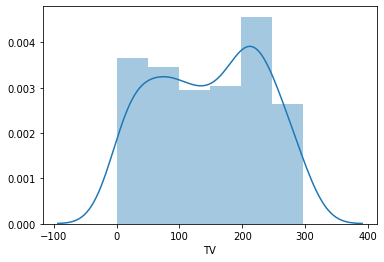

In [59]:
sns.distplot(df["TV"])

<AxesSubplot:xlabel='newspaper'>

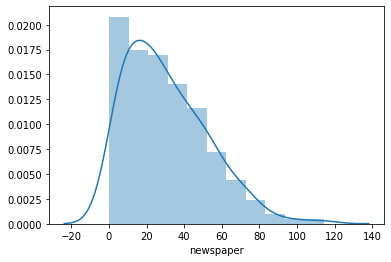

In [60]:
sns.distplot(df["newspaper"])

In [61]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [62]:
### Apply transformation technique to make the skewed numerical variable normaly distributed

import numpy as np

df["newspaper"] = np.log1p(df["newspaper"])

<AxesSubplot:xlabel='newspaper'>

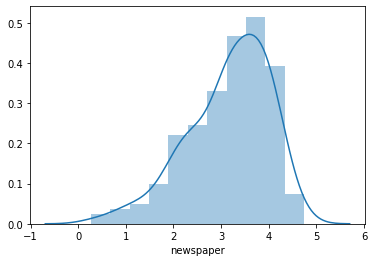

In [63]:
sns.distplot(df["newspaper"])

In [64]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,3.153164,14.022500
std,85.854236,14.846809,0.866508,5.217457
min,0.700000,0.000000,0.262364,1.600000
25%,74.375000,9.975000,2.621019,10.375000
50%,149.750000,22.900000,3.286519,12.900000
75%,218.825000,36.525000,3.830813,17.400000
max,296.400000,49.600000,4.744932,27.000000


In [65]:
df_num = df.drop("sales",axis=1)

In [66]:
df_num.head()

,TV,radio,newspaper
0,230.1,37.8,4.251348
1,44.5,39.3,3.830813
2,17.2,45.9,4.252772
3,151.5,41.3,4.085976
4,180.8,10.8,4.084294


In [67]:
## scaling

from sklearn.preprocessing import MinMaxScaler

In [68]:
mn = MinMaxScaler()
df_mn = mn.fit_transform(df_num)

In [69]:
## df_mn

In [70]:
## convert the array to dataframe

df_num_df = pd.DataFrame(df_mn, columns=df_num.columns, index=df_num.index)

In [71]:
df_num_df.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.889888
1,0.148123,0.792339,0.796072
2,0.055800,0.925403,0.890206
3,0.509976,0.832661,0.852996
4,0.609063,0.217742,0.852621


In [72]:
## correlation

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.030951,0.782224
radio,0.054809,1.000000,0.251909,0.576223
newspaper,0.030951,0.251909,1.000000,0.164501
sales,0.782224,0.576223,0.164501,1.000000


In [73]:
#3 assign x and y - x as independet varaibles and y as dependent variable
x = df_num_df
y = df["sales"]

In [74]:
## train test split

from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [76]:
## import the linear regression package

from sklearn.linear_model import LinearRegression

In [77]:
## model training

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
## prediction

pred = lr.predict(X_test)

In [79]:
## evalaution

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [80]:
r2_score(y_test, pred)

0.8917065013140674

In [81]:
mean_absolute_error(y_test, pred)

1.049732472487043

In [82]:
mean_squared_error(y_test, pred)

2.011464426457883

In [83]:
## what are the coefficients

lr.coef_

array([13.85714006,  8.83406614,  0.5214694 ])

In [84]:
...pp

SyntaxError: invalid syntax (<ipython-input-84-ab52ea9dc549>, line 1)

In [ ]:
## let me go and drop the newspaper variable

x = df_num_df.drop("newspaper", axis=1)
y = df["sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:

pred = lr.predict(X_test)

In [ ]:
r2_score(y_test, pred)

In [ ]:
x.head()

In [ ]:
## only with the TV and radio i can predict the sales of teh company

In [ ]:
## check for overfitting

pred_train = lr.predict(X_train)

In [ ]:
r2_score(y_train, pred_train)

In [ ]:
## the model is not overfitting by comparing the train and test scores

## How to overcome the overfitting issues

In [ ]:
## Regularization technique

In [85]:
from sklearn.linear_model import Lasso, Ridge

In [86]:
ls = Lasso()
ls.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
pred = ls.predict(X_test)

In [88]:
r2_score(y_test, pred)

0.17895641564146492

In [89]:
r2_score(y_train, ls.predict(X_train))

0.2443101557223062

In [90]:
ls = Lasso(alpha=2)
ls.fit(X_train, y_train)

Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [91]:
pred = ls.predict(X_test)

In [92]:
r2_score(y_test, pred)

-0.06006527537702655

In [93]:
ls = Lasso(alpha= 0.04)
ls.fit(X_train, y_train)

Lasso(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
pred = ls.predict(X_test)

In [95]:
r2_score(y_test, pred)

0.8922843049892827

In [96]:
r2_score(y_train, ls.predict(X_train))

0.8947195131477497

In [97]:
ls.coef_

array([13.43275229,  8.53362402,  0.        ])

## Ridge regression

In [98]:
rd = Ridge()
rd.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
pred = rd.predict(X_test)

In [100]:
r2_score(y_test, pred)

0.8902522925903561

In [101]:
r2_score(y_train, rd.predict(X_train))

0.8927905796723031

In [102]:
rd.coef_

array([12.96708672,  8.31752615,  0.6786042 ])